《[利用Python进行数据分析](https://book.douban.com/subject/25779298/)》读书笔记。
 
 第8章：绘图和可视化

所有用到的数据可以从[作者的 github](https://github.com/wesm/pydata-book)下载。

In [1]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


绘图是数据分析工作中，最重要的任务之一。是数据探索过程的一部分。


# matplotlib API入门

## Figure和Subplot

matplotlib的图像都位于Figure对象中。用plt.figure创建一个新的Figure。

subplot 可以在一个 Figure 中创造子图。

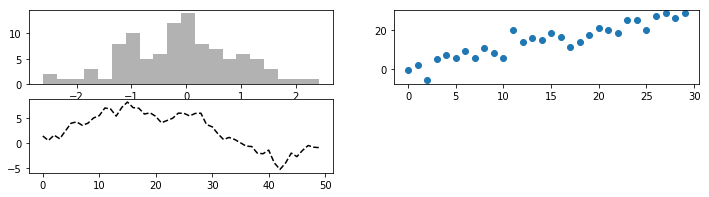

In [27]:
#fig 有一些重要的选项，特别是figsize，规定了图片尺寸
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# 默认在最后一个 subplot 上绘制
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

#fig.add_subplot 返回的对象是AxesSubplot对象
_ = ax1.hist(np.random.randn(100),bins = 20,color = 'k',alpha = 0.3) 
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.randn(30))

(array([  2.,   1.,   1.,   3.,   4.,  10.,  10.,  10.,  10.,  10.,   8.,
          9.,  11.,   4.,   0.,   3.,   3.,   0.,   0.,   1.]),
 array([-2.59564423, -2.31314071, -2.0306372 , -1.74813369, -1.46563017,
        -1.18312666, -0.90062314, -0.61811963, -0.33561612, -0.0531126 ,
         0.22939091,  0.51189443,  0.79439794,  1.07690145,  1.35940497,
         1.64190848,  1.924412  ,  2.20691551,  2.48941902,  2.77192254,
         3.05442605]),
 <a list of 20 Patch objects>)

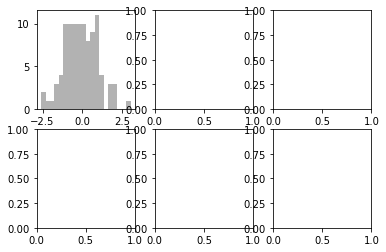

In [46]:
plt.close('all')
# 直接创建并返回 subplot 对象的Numpy数组 
fig,axes = plt.subplots(2,3)
axes[0][0].hist(np.random.randn(100),bins = 20,color = 'k',alpha = 0.3)

In [47]:
print(fig)
print(axes)

Figure(432x288)
[[<matplotlib.axes._subplots.AxesSubplot object at 0x11d7d3dd8>


可以指定多个 subplot  共用坐标轴。

subplots 的属性：

- nrows: 行数
- ncols: 列数
- sharex: 使用相同的 x 刻度
- sharey: 使用相同的 y 刻度
- ...

## 调整subplot周围的间距

subplots_adjust(left = None,bottom = None,right = None,top = None,wspace = None,hspace = None)

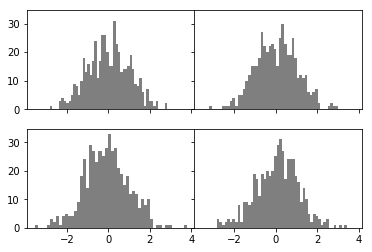

In [44]:
# wspace和space用于控制宽度和高度的百分比，可以用做subplot之间的间距
fig,ax = plt.subplots(2,2,sharex = True,sharey = True) 
for i in range(2): 
    for j in range(2): 
        ax[i,j].hist(np.random.randn(500),bins = 50,color = 'k',alpha = 0.5) 
plt.subplots_adjust(wspace = 0,hspace = 0.2) 
# plt.show() 
# matplotlib不会检查标签的重叠

## 颜色、标记和线型

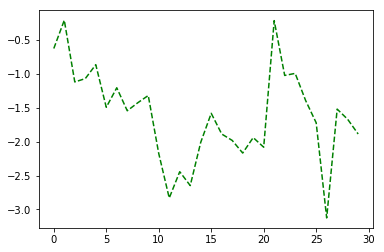

In [49]:
# 绿色虚线
plt.figure()
plt.plot(randn(30).cumsum(), 'g--')

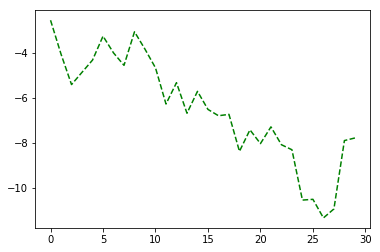

In [52]:
# 等价于
plt.plot(randn(30).cumsum(), linestyle='--', color='g')

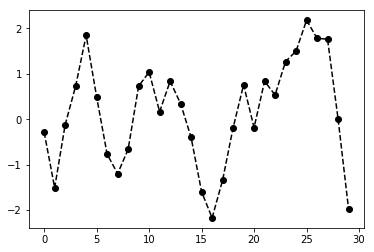

In [57]:
# 加上标记点
plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')
# 等价于
# plt.plot(randn(30).cumsum(), color='k', linestyle='--', marker='o')

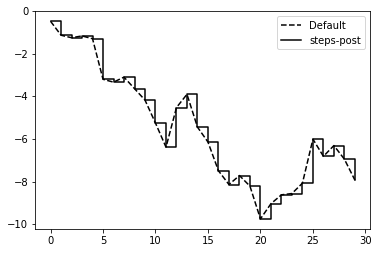

In [55]:
# drawstyle 指定插值方式
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## 刻度、标签和图例

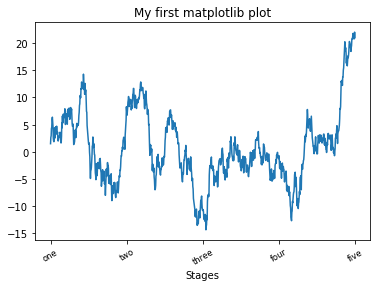

In [59]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())

# x 刻度
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

# x 刻度标签
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
# 图表标题
ax.set_title('My first matplotlib plot')

# x 标题
ax.set_xlabel('Stages')

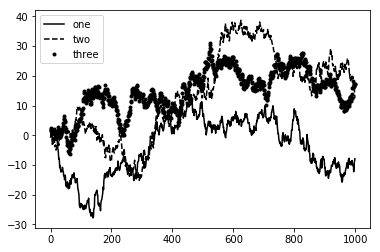

In [60]:
#  增加图例

fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

## 注解及在 subplot 上绘图

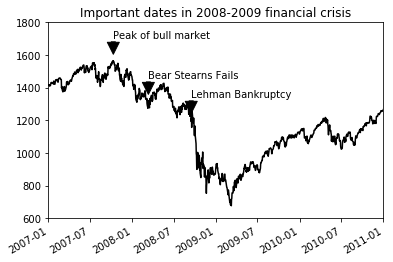

In [63]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('data/ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

# 逐个添加注解
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),  
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')

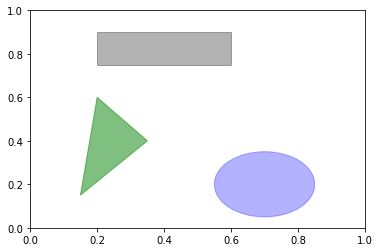

In [64]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 保存到文件

In [65]:
fig
fig.savefig('figpath.svg')

In [66]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [67]:
from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

In [68]:
# 全局设置
plt.rc('figure', figsize=(10, 10))

# pandas中的绘图函数

matplotlib是一种比较低级的工具，需要将各种组件组合好：数据展示（线型图、柱状图等）、图例、标题、刻度标签以及注解。

在pandas中，能够利用DataFrame的对象特点创建标准图表的高级绘图方法。会省事不少。

##  线形图

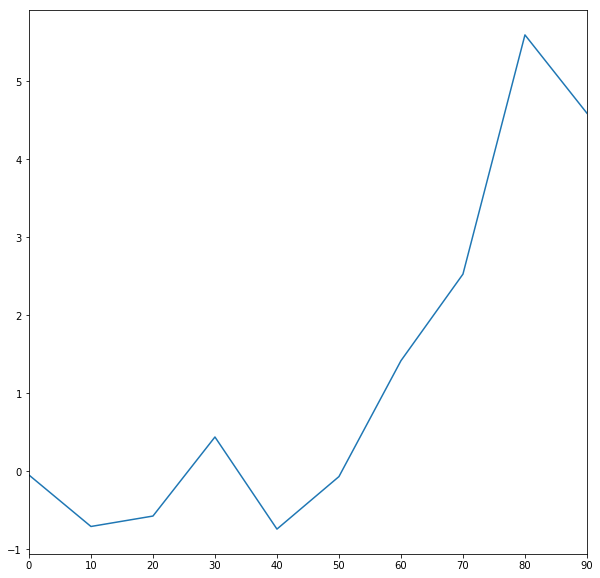

In [69]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

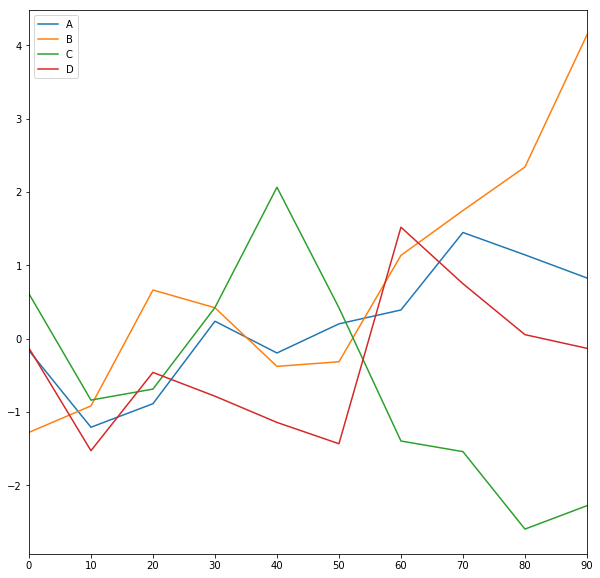

In [70]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0, 100, 10))
df.plot()

##  柱状图

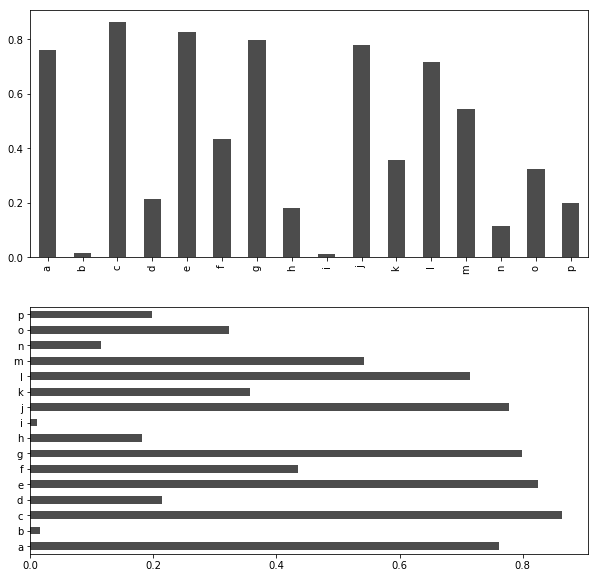

In [71]:
fig, axes = plt.subplots(2, 1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

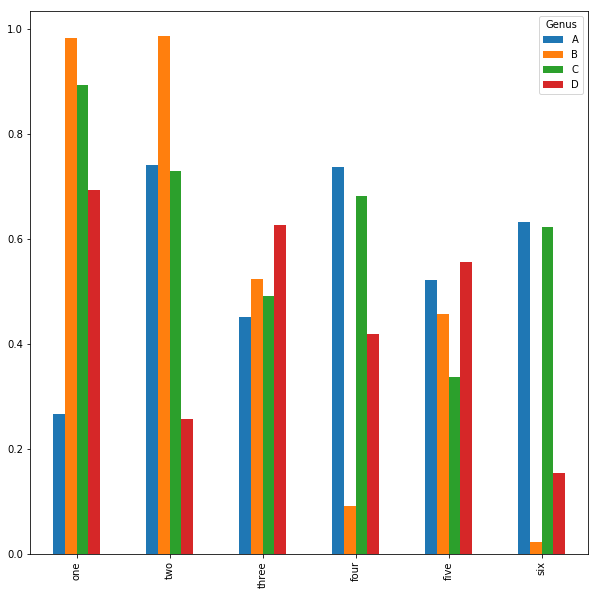

In [72]:
df = DataFrame(np.random.rand(6, 4),
               index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot(kind='bar')

In [73]:
plt.figure()

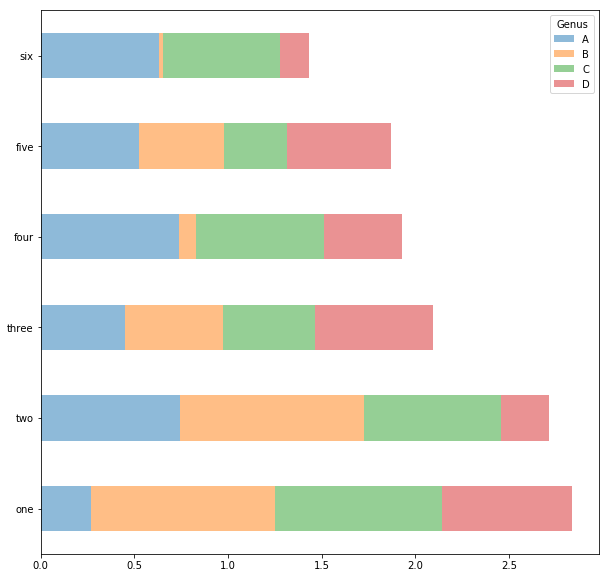

In [74]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [77]:
tips = pd.read_csv('data/ch08/tips.csv')
party_counts = pd.crosstab(tips.day, tips.size)
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]

In [80]:
# Normalize to sum to 1
# party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
# party_pcts
# party_pcts.plot(kind='bar', stacked=True)

## 直方图和密度图

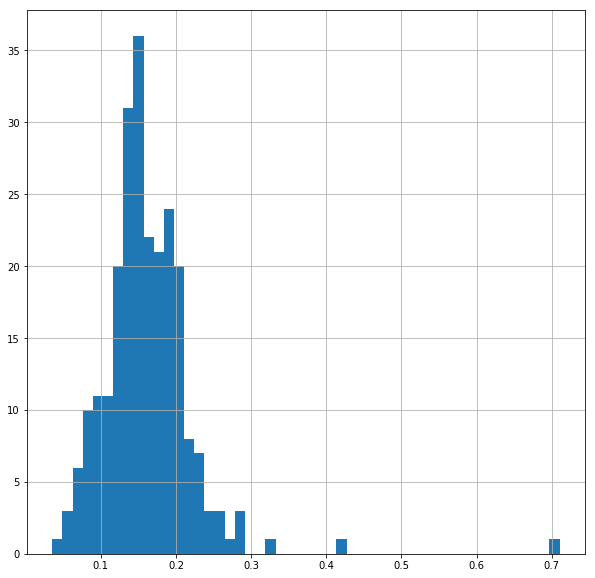

In [81]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

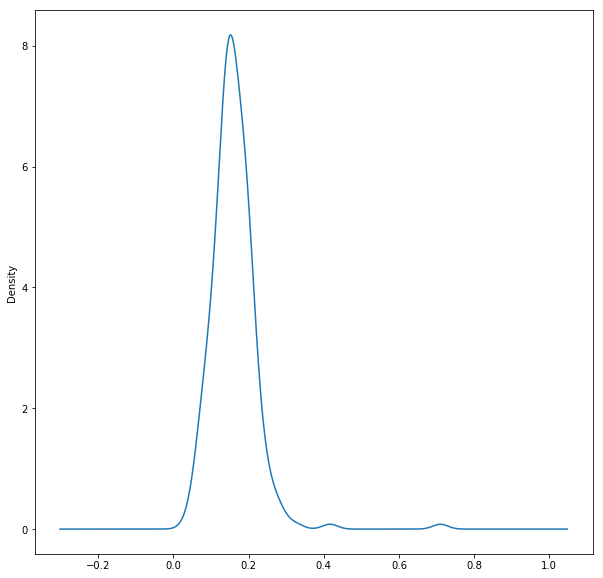

In [82]:
tips['tip_pct'].plot(kind='kde')

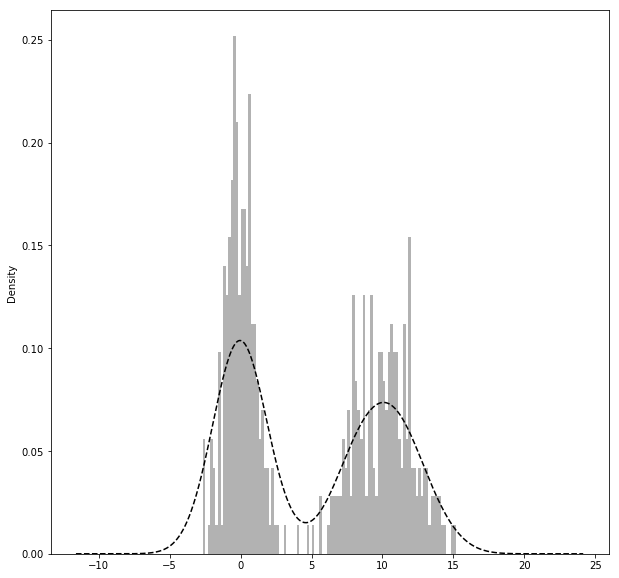

In [83]:
comp1 = np.random.normal(0, 1, size=200)  # N(0, 1)
comp2 = np.random.normal(10, 2, size=200)  # N(10, 4)
values = Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

##  散点图

In [85]:
macro = pd.read_csv('data/ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122aea438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1230aa7b8>]], dtype=object)

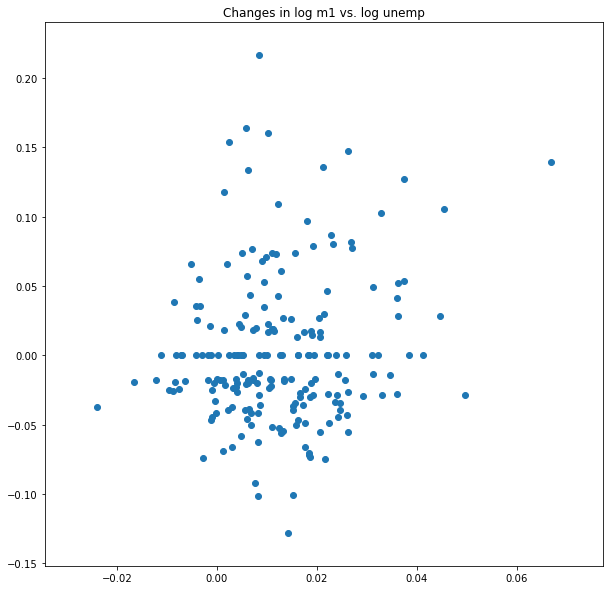

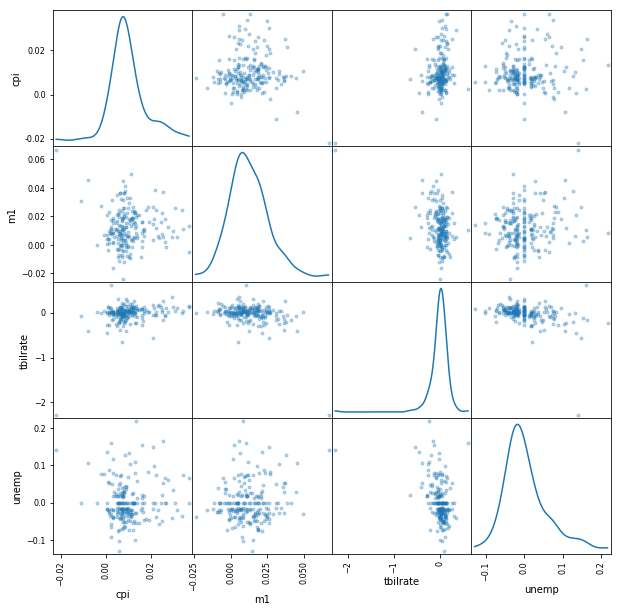

In [87]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))
pd.scatter_matrix(trans_data, diagonal='kde', alpha=0.3)

# 绘制地图

 需要安装 Basemap:
 
 ```
 conda install basemap
 ```

In [88]:
data = pd.read_csv('data/ch08/Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 280.8+ KB


In [89]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [90]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [91]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [92]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70)
            & data.CATEGORY.notnull()]

In [93]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

In [94]:
get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [95]:
all_cats = get_all_categories(data.CATEGORY)
# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']
english_mapping['6c']

'Earthquake and aftershocks'

In [96]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

In [97]:
dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [98]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1

data = data.join(dummy_frame.add_prefix('category_'))

In [99]:
data.ix[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 167.3 KB


In [105]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25,
                    lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
                lon_0=(urlon + lllon) / 2,
                lat_0=(urlat + lllat) / 2,
                llcrnrlat=lllat, urcrnrlat=urlat,
                llcrnrlon=lllon, urcrnrlon=urlon,
                resolution='f')
    # draw coastlines, state and country boundaries, edge of map.
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                        lllon=lllon, urlon=urlon)

    cat_data = data[data['category_%s' % code] == 1]

    # compute map proj coordinates.
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)

    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

def make_plot():

    for i, code in enumerate(to_plot):
        cat_data = data[data['category_%s' % code] == 1]
        lons, lats = cat_data.LONGITUDE, cat_data.LATITUDE

        ax = axes.flat[i]
        m = basic_haiti_map(ax, lllat=lllat, urlat=urlat,
                            lllon=lllon, urlon=urlon)

        # compute map proj coordinates.
        x, y = m(lons.values, lats.values)

        m.plot(x, y, 'k.', alpha=0.5)
        ax.set_title('%s: %s' % (code, english_mapping[code]))
        

In [ ]:
make_plot()

In [ ]:
shapefile_path = 'data/ch08/PortAuPrince_Roads/PortAuPrince_Roads'
m.readshapefile(shapefile_path, 'roads')

# Python 图形化工具生态系统

- Chaco
- mayavi
